introducao-CNN

Exercício:
Abra a imagem figs/messi5.jpg
recorte a bola

copie em outra parte da imagem

rotacione a imagem em 60 graus

Altere o tamanho da imagem mantendo a proporção


In [3]:
import cv2

In [6]:
messi = cv2.imread('figs/messi5.jpg')
print(messi.shape)

(342, 548, 3)


## Ex1

### Recorte

(60, 60, 3)


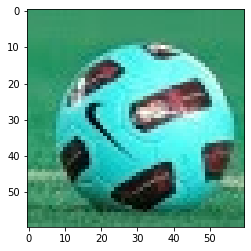

In [19]:
import matplotlib.pyplot as plt
recorte = messi[280:340, 330:390]
print(recorte.shape)
plt.imshow(recorte)

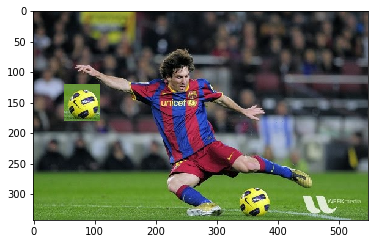

In [27]:
messi_recorte = messi.copy()
messi_recorte[120:180, 50:110] = recorte
plt.imshow(cv2.cvtColor(messi_recorte, cv2.COLOR_BGR2RGB))

### rotacao

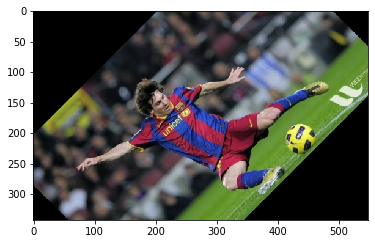

In [26]:
rows,cols,channels = messi.shape
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### reshape proporcional

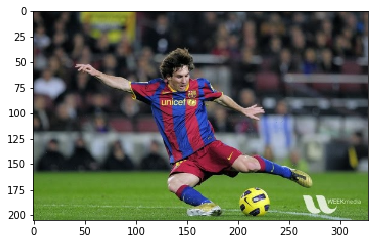

In [29]:
proporcao = 60
largura_nova = int(messi.shape[1] * proporcao / 100)
altura_nova = int(messi.shape[0] * proporcao / 100)
dimensoes = (largura_nova, altura_nova)

img_prop = cv2.resize(messi,dimensoes)
plt.imshow(cv2.cvtColor(img_prop, cv2.COLOR_BGR2RGB))

## Ex2

Exercício 2:

Avalie o uso de filtros para eliminar ruídos e detectar contornos na imagem figs/11.jpg

Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias

In [124]:
img = cv2.imread('figs/11.jpg')
print(img.shape)

(300, 300, 3)


## FILTRO BLUR

Text(0.5, 1.0, 'bilateral kernel 7')

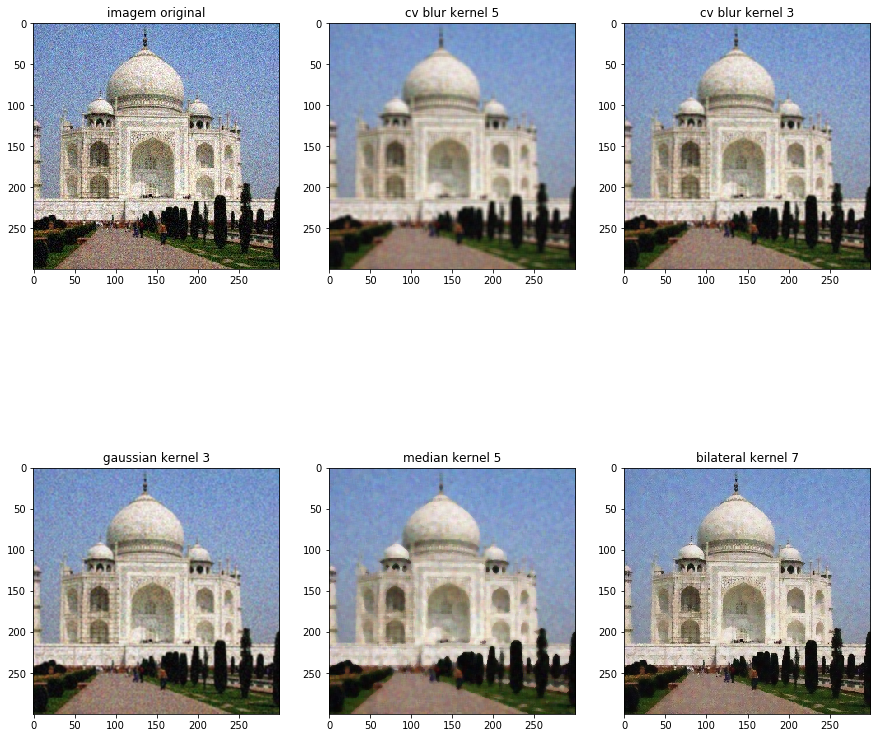

In [62]:
img_blurred = cv2.blur(img, ksize = (5, 5))

img_blurred1 = cv2.blur(img, ksize = (3,3))
img_blurred2 = cv2.GaussianBlur(img, ksize = (3,3), sigmaX = 0)   
img_blurred3 = cv2.medianBlur(img, 5)
img_blurred4 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,15))

axes=axes.flatten()

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("imagem original")
axes[1].imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
axes[1].set_title("cv blur kernel 5")
axes[2].imshow(cv2.cvtColor(img_blurred1, cv2.COLOR_BGR2RGB))
axes[2].set_title("cv blur kernel 3")
axes[3].imshow(cv2.cvtColor(img_blurred2, cv2.COLOR_BGR2RGB))
axes[3].set_title("gaussian kernel 3")
axes[4].imshow(cv2.cvtColor(img_blurred3, cv2.COLOR_BGR2RGB))
axes[4].set_title("median kernel 5")
axes[5].imshow(cv2.cvtColor(img_blurred4, cv2.COLOR_BGR2RGB))
axes[5].set_title("bilateral kernel 7")

MELHOR RESULTADO APARANTEMENTE:
BILATERAL, COM KERNEL 7. DIMINUIU MUITO OS RUIDOS MAS NAO DISTORCEU TANTO A IMAGEM NEM PIOROU QUALIDADE

## Fechamento

Text(0.5, 1.0, 'MELHOR BLUR')

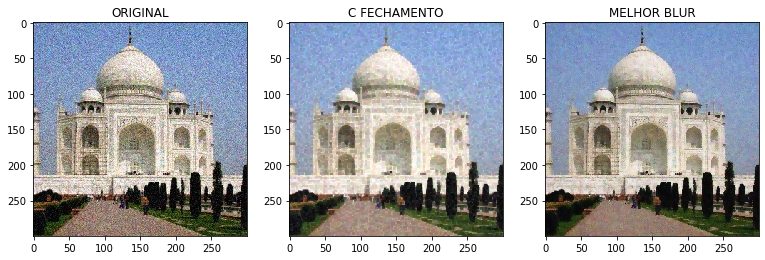

In [79]:
import numpy as np
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fechada = cv2.cvtColor(closing, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,3, figsize = (13,13))
axes[1].imshow(fechada)
axes[1].set_title("C FECHAMENTO")
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("ORIGINAL")
axes[2].imshow(cv2.cvtColor(img_blurred4, cv2.COLOR_BGR2RGB))
axes[2].set_title("MELHOR BLUR")

## Abertura

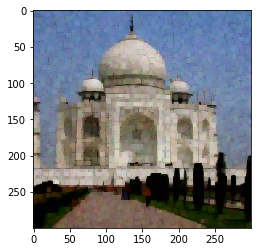

In [99]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.imshow(img)

## Erosao

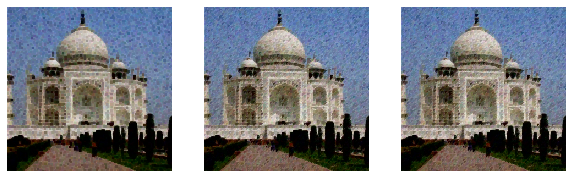

In [91]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Criando kernels (filtros) para erosão
kernel_0 = np.ones((2, 2), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
kernels = [kernel_0, kernel_1, kernel_2]


plt.figure(figsize = (10, 10))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

## Dilatacao

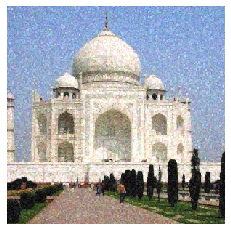

In [87]:
import cv2 as cv
import numpy as np

kernel = np.ones((2,2),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.axis("off")
plt.imshow(dilation)
plt.show()

### MELHOR RESULTADO FOI O BLUR BILATERAL

## BORDAS

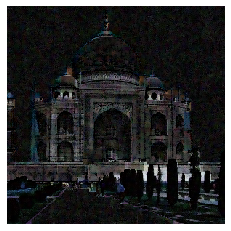

In [96]:
kernel = np.ones((12,12),np.uint8)
tophat = cv.morphologyEx(img_blurred4, cv.MORPH_TOPHAT, kernel)

plt.axis("off")
plt.imshow(tophat)
plt.show()

### Canny

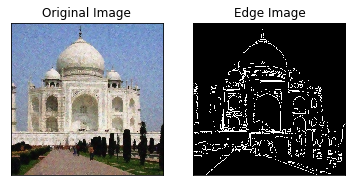

In [138]:
# img_blurred4 = cv2.cvtColor(img_blurred4, cv2.COLOR_BGR2RGB)
edges = cv.Canny(img_blurred4,150,300)

plt.subplot(121),plt.imshow(img_blurred4,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [143]:
# Convert the image to grayscale
img = cv.cvtColor(img_blurred4, cv.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv.threshold(img, thresh = 127, maxval = 255, type = cv.THRESH_BINARY)
adap_mean_2 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv.adaptiveThreshold(img, 255, 
                                        cv.ADAPTIVE_THRESH_MEAN_C, 
                                        cv.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv.THRESH_BINARY, 7, 8)

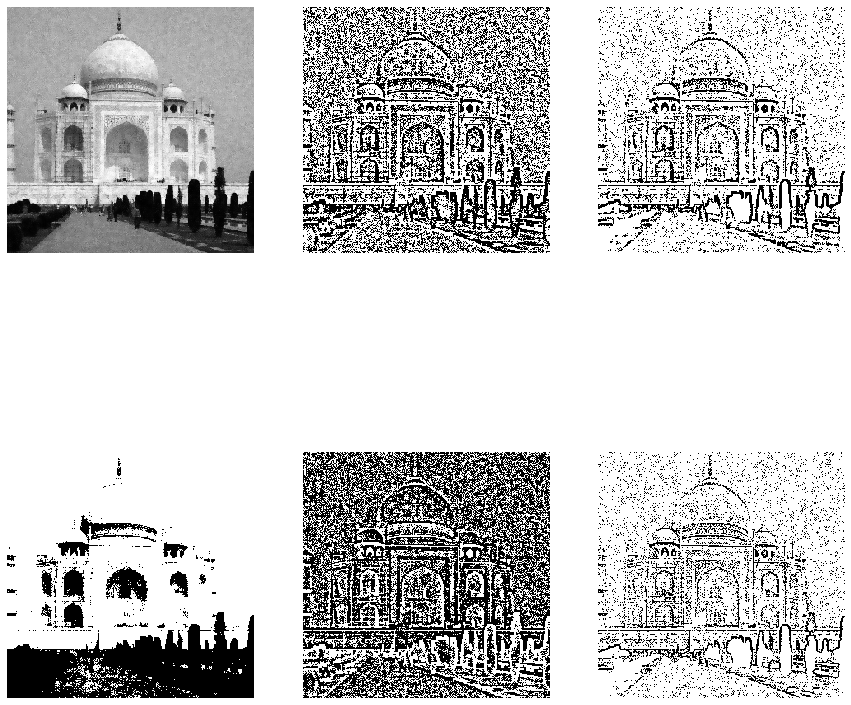

In [144]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()